# Analysis of NBA Player Stats Dataset for the 2023-2024 season

## Description
This time, I will analyze the NBA player statistics dataset for the 2023-2024 season, focusing on monthly performance trends.
The steps that will be taken are Data Collecting, Data Preprocessing, EDA, Statistical Analysis and conclusion.

## Data Source
- The data for this project has been sourced from the Kaggle platforma respected platform for sharing and discovering datasets across a wide range of fields.
- The dataset titled "NBA Player Stats Dataset for the 2023-2024" was uploaded by BRYAN WEATHER CHUNG and it can be accessed through the following Kaggle link:https://www.kaggle.com/datasets/bryanchungweather/nba-player-stats-dataset-for-the-2023-2024

## Data Description
This dataset provides comprehensive statistics for NBA players during the 2023-2024 regular season. It encompasses over 400 rows and 30 columns, presenting a wide range of player performance metrics. The data is derived from Basketball Reference, ensuring accuracy and reliability. However, it's worth noting that there may be duplicate player names due to team changes throughout the season (Which will show TOT for the total status of the player).

**Columns Description :**
- Rk: Rank
- Player: Player's name
- Pos: Position
- Age: Player's age
- Tm: Team
- G: Games played
- GS: Games started
- MP: Minutes played per game
- FG: Field goals per game
- FGA: Field goal attempts per game
- FG%: Field goal percentage
- 3P: 3-point field goals per game
- 3PA: 3-point field goal attempts per game
- 3P%: 3-point field goal percentage
- 2P: 2-point field goals per game
- 2PA: 2-point field goal attempts per game
- 2P%: 2-point field goal percentage
- eFG%: Effective field goal percentage
- FT: Free throws per game
- FTA: Free throw attempts per game
- FT%: Free throw percentage
- ORB: Offensive rebounds per game
- DRB: Defensive rebounds per game
- TRB: Total rebounds per game
- AST: Assists per game
- STL: Steals per game
- BLK: Blocks per game
- TOV: Turnovers per game
- PF: Personal fouls per game
- PTS: Points per gamer game
- PTS: Points per gamels per game
PTS: Points per game

## Gathering, Assesing & Cleaning Data
Let’s start this task by importing the necessary Python libraries and the dataset :

In [17]:
# Import pustaka pandas untuk manipulasi data
import pandas as pd
# Import pustaka numpy untuk operasi numerik
import numpy as np
# Import pustaka matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# Import pustaka scipy untuk uji statistik
import scipy.stats as stats
# Import pustaka seaborn untuk visualisasi data
import seaborn as sns
# Import fungsi train_test_split dari sklearn untuk membagi data menjadi set pelatihan dan pengujian
from sklearn.model_selection import train_test_split
# Import model LinearRegression dari sklearn untuk membangun model regresi linier
from sklearn.linear_model import LinearRegression
# Import mean_squared_error dan r2_score dari sklearn untuk evaluasi model
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Membaca dataset dari file CSV untuk bulan November, Desember, dan Januari
# Setiap file berisi data permainan NBA untuk setiap bulan tertentu
df_nov = pd.read_csv('DatasetNBA/NBA_2024_per_game(28-11-2023).csv')
df_des = pd.read_csv('DatasetNBA/NBA_2024_per_game(27-12-2023).csv')
df_jan = pd.read_csv('DatasetNBA/NBA_2024_per_game(26-01-2024).csv')

In [19]:
# Menambahkan kolom baru 'Bulan' ke dalam setiap DataFrame untuk mengidentifikasi bulan data tersebut
df_nov['Bulan'] = 'November'
df_des['Bulan'] = 'Desember'
df_jan['Bulan'] = 'Januari'

In [20]:
# Mengecek jumlah nilai kosong (missing values) di setiap kolom DataFrame untuk bulan November, Desember, dan Januari
print(df_nov.isnull().sum())
print(df_des.isnull().sum())
print(df_jan.isnull().sum())

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%       10
3P         0
3PA        0
3P%       60
2P         0
2PA        0
2P%       19
eFG%      10
FT         0
FTA        0
FT%       71
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Bulan      0
dtype: int64
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        9
3P         0
3PA        0
3P%       51
2P         0
2PA        0
2P%       19
eFG%       9
FT         0
FTA        0
FT%       64
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Bulan      0
dtype: int64
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        9
3P         0
3PA        0
3P%       48
2P         0
2PA        0

In [21]:
# Menghapus baris yang memiliki nilai kosong (NaN) dari setiap DataFrame untuk bulan November, Desember, dan Januari
df_nov = df_nov.dropna()
df_des = df_des.dropna()
df_jan = df_jan.dropna()

In [22]:
# Mengecek jumlah baris duplikat di setiap DataFrame untuk bulan November, Desember, dan Januari
print(df_nov.duplicated().sum())
print(df_des.duplicated().sum())
print(df_jan.duplicated().sum())

0
0
0


In [23]:
# Menggabungkan DataFrame dari bulan November, Desember, dan Januari menjadi satu DataFrame
# Menggabungkan df_nov, df_des, dan df_jan menjadi satu DataFrame
# ignore_index=True memastikan indeks baru akan diberikan dari 0 hingga n-1 untuk baris gabungan
combined_df = pd.concat([df_nov, df_des, df_jan], ignore_index=True)

In [24]:
# Menampilkan DataFrame gabungan untuk memastikan data dari tiga bulan telah digabung dengan benar
# Mencetak DataFrame combined_df
print(combined_df)

                        Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  \
0             Precious Achiuwa   C   24  TOR  11   0  19.0  2.9   6.4  0.457   
1                  Bam Adebayo   C   26  MIA  14  14  34.4  8.3  15.5  0.535   
2                 Ochai Agbaji  SG   23  UTA  16   6  18.9  1.9   4.4  0.429   
3                 Santi Aldama  PF   23  MEM  10   4  26.5  5.8  13.0  0.446   
4     Nickeil Alexander-Walker  SG   25  MIN  16   5  22.2  2.3   5.6  0.416   
...                        ...  ..  ...  ...  ..  ..   ...  ...   ...    ...   
1293              Delon Wright  PG   31  WAS  22   0  16.7  1.7   4.5  0.374   
1294            Thaddeus Young  PF   35  TOR  16   3  12.4  1.8   3.3  0.528   
1295                Trae Young  PG   25  ATL  39  39  36.3  8.3  19.7  0.422   
1296            Omer Yurtseven   C   25  UTA  24   6  10.7  1.6   3.2  0.500   
1297               Cody Zeller   C   31  NOP  31   0   8.5  0.6   1.6  0.400   

      ...  ORB  DRB   TRB   AST  STL  B

In [25]:
# Melihat informasi umum tentang data
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  1298 non-null   object 
 1   Pos     1298 non-null   object 
 2   Age     1298 non-null   int64  
 3   Tm      1298 non-null   object 
 4   G       1298 non-null   int64  
 5   GS      1298 non-null   int64  
 6   MP      1298 non-null   float64
 7   FG      1298 non-null   float64
 8   FGA     1298 non-null   float64
 9   FG%     1298 non-null   float64
 10  3P      1298 non-null   float64
 11  3PA     1298 non-null   float64
 12  3P%     1298 non-null   float64
 13  2P      1298 non-null   float64
 14  2PA     1298 non-null   float64
 15  2P%     1298 non-null   float64
 16  eFG%    1298 non-null   float64
 17  FT      1298 non-null   float64
 18  FTA     1298 non-null   float64
 19  FT%     1298 non-null   float64
 20  ORB     1298 non-null   float64
 21  DRB     1298 non-null   float64
 22  

In [26]:
# Melihat statistik deskriptif
print(combined_df.describe())

               Age            G           GS           MP           FG  \
count  1298.000000  1298.000000  1298.000000  1298.000000  1298.000000   
mean     26.068567    21.085516     9.870570    20.669029     3.554083   
std       4.418446    11.436173    12.444178     9.749131     2.576596   
min      19.000000     1.000000     0.000000     2.000000     0.000000   
25%      23.000000    12.250000     0.000000    12.625000     1.500000   
50%      25.000000    18.000000     3.000000    20.950000     2.800000   
75%      29.000000    29.000000    16.000000    29.375000     5.100000   
max      39.000000    45.000000    45.000000    38.500000    12.100000   

               FGA          FG%           3P          3PA          3P%  ...  \
count  1298.000000  1298.000000  1298.000000  1298.000000  1298.000000  ...   
mean      7.657935     0.452442     1.115485     3.103236     0.325535  ...   
std       5.253870     0.094500     0.914721     2.259135     0.140946  ...   
min       0.50000

## Data Visualization
Here I will try to see what visualisations can be displayed.

I tried to display some top 10 data for various categories such as top scores, top assists, top rebounders and others.

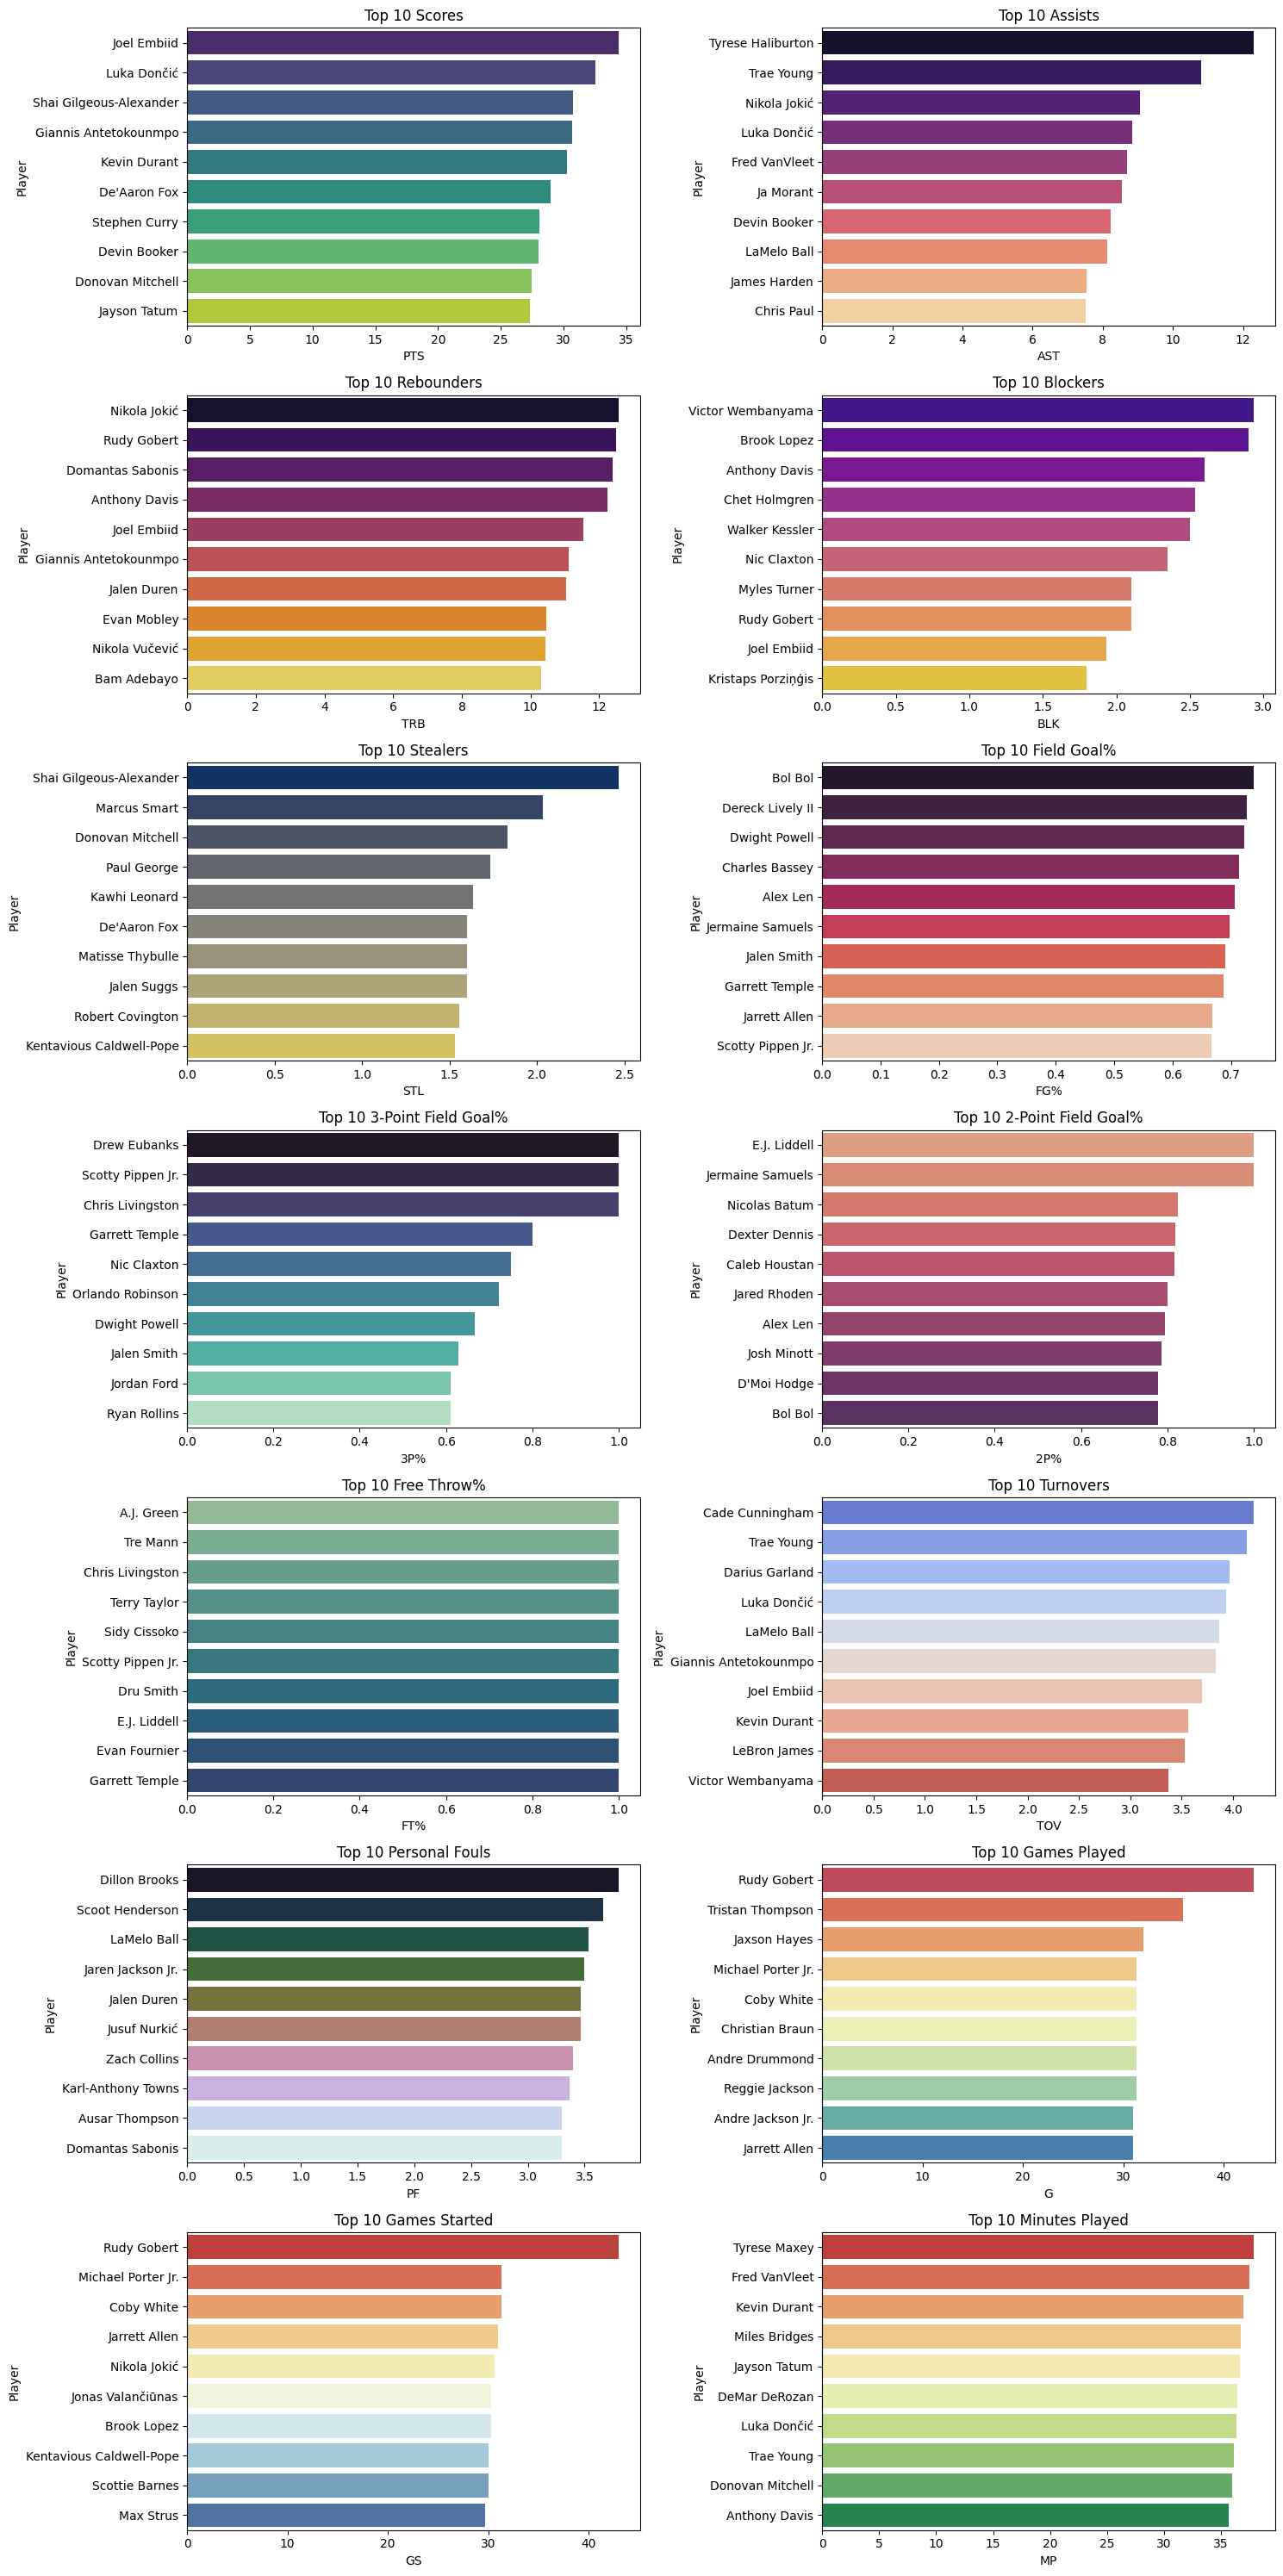

In [27]:
# Mengumpulkan data top 10 untuk berbagai kategori
categories = {
    'PTS': 'Top 10 Scores',
    'AST': 'Top 10 Assists',
    'TRB': 'Top 10 Rebounders',
    'BLK': 'Top 10 Blockers',
    'STL': 'Top 10 Stealers',
    'FG%': 'Top 10 Field Goal%',
    '3P%': 'Top 10 3-Point Field Goal%',
    '2P%': 'Top 10 2-Point Field Goal%',
    'FT%': 'Top 10 Free Throw%',
    'TOV': 'Top 10 Turnovers',
    'PF': 'Top 10 Personal Fouls',
    'G': 'Top 10 Games Played',
    'GS': 'Top 10 Games Started',
    'MP': 'Top 10 Minutes Played'
}

# Menyiapkan figure dan axis untuk subplots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))
axes = axes.flatten()

# Daftar palet warna yang berbeda
palettes = [
    "viridis", "magma", "inferno", "plasma", "cividis", "rocket", "mako", 
    "flare", "crest", "coolwarm", "cubehelix", "Spectral", "RdYlBu", "RdYlGn"
]

for i, (stat, title) in enumerate(categories.items()):
    top_players = combined_df.groupby('Player')[stat].mean().sort_values(ascending=False).head(10).reset_index()
    palette = sns.color_palette(palettes[i % len(palettes)], n_colors=10)  # Membuat palet warna sebagai daftar warna
    sns.barplot(x=stat, y='Player', data=top_players, ax=axes[i], hue='Player', palette=palette, dodge=False, legend=False)
    axes[i].set_title(title)
    axes[i].set_xlabel(stat)
    axes[i].set_ylabel('Player')

# Adjust layout
plt.tight_layout()
plt.show()

Next, I tried to display 10 players who have the basic efficiency metric.

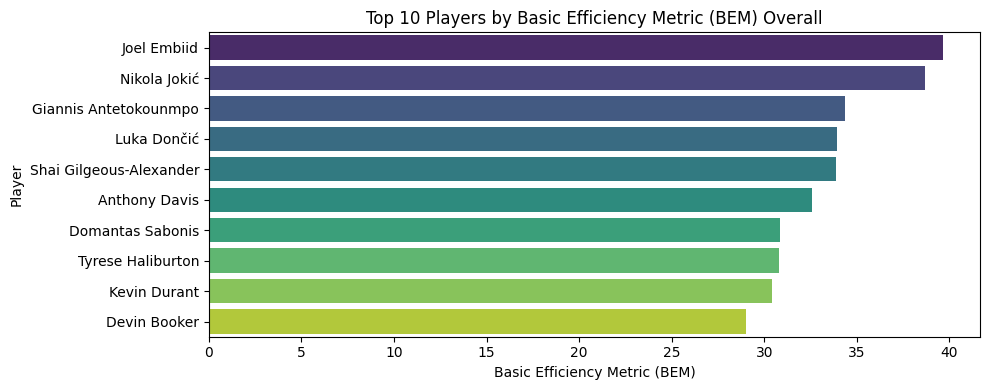

In [28]:
# Menghitung Basic Efficiency Metric (BEM) untuk setiap pemain
combined_df['BEM'] = (
    combined_df['PTS'] +
    combined_df['TRB'] +
    combined_df['AST'] +
    combined_df['STL'] +
    combined_df['BLK'] -
    (combined_df['FGA'] - combined_df['FG']) -
    (combined_df['FTA'] - combined_df['FT']) -
    combined_df['TOV']
)

# Mengumpulkan top 10 pemain berdasarkan BEM secara keseluruhan
top_bem_players_overall = combined_df.groupby('Player')['BEM'].mean().sort_values(ascending=False).head(10).reset_index()

# Menyiapkan figure untuk diagram
plt.figure(figsize=(10, 4))

# Menggunakan palet warna yang menarik
palette = sns.color_palette("viridis", n_colors=10)

# Membuat diagram batang untuk top 10 pemain berdasarkan BEM secara keseluruhan
sns.barplot(x='BEM', y='Player', data=top_bem_players_overall, palette=palette, hue='Player', dodge=False, legend=False)

# Menambahkan judul dan label
plt.title('Top 10 Players by Basic Efficiency Metric (BEM) Overall')
plt.xlabel('Basic Efficiency Metric (BEM)')
plt.ylabel('Player')

# Menampilkan diagram
plt.tight_layout()
plt.show()

Then I tried histograms for the distribution of points per game, assists per game and rebounds per game.

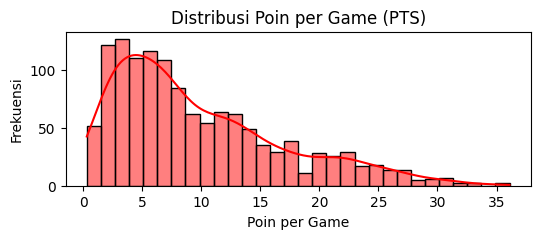

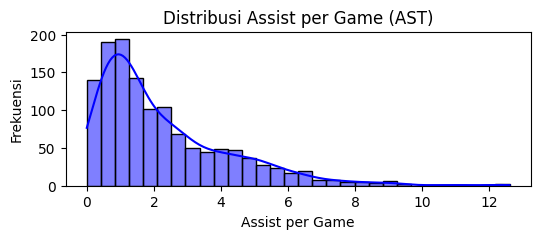

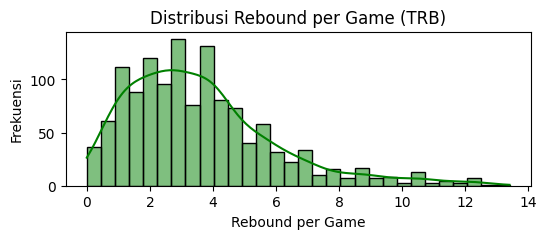

In [29]:
# Membuat histogram untuk distribusi poin per game (PTS)
plt.figure(figsize=(6, 2))  # Mengatur ukuran gambar
sns.histplot(combined_df['PTS'], bins=30, kde=True, color='red')  # Membuat histogram dengan KDE (Kernel Density Estimate)
plt.title('Distribusi Poin per Game (PTS)')  # Menambahkan judul pada plot
plt.xlabel('Poin per Game')  # Menambahkan label sumbu x
plt.ylabel('Frekuensi')  # Menambahkan label sumbu y

# Membuat histogram untuk distribusi assist per game (AST)
plt.figure(figsize=(6, 2))  # Mengatur ukuran gambar
sns.histplot(combined_df['AST'], bins=30, kde=True, color='blue')  # Membuat histogram dengan KDE (Kernel Density Estimate)
plt.title('Distribusi Assist per Game (AST)')  # Menambahkan judul pada plot
plt.xlabel('Assist per Game')  # Menambahkan label sumbu x
plt.ylabel('Frekuensi')  # Menambahkan label sumbu y

# Membuat histogram untuk distribusi rebound per game (TRB)
plt.figure(figsize=(6, 2))  # Mengatur ukuran gambar
sns.histplot(combined_df['TRB'], bins=30, kde=True, color='green')  # Membuat histogram dengan KDE (Kernel Density Estimate)
plt.title('Distribusi Rebound per Game (TRB)')  # Menambahkan judul pada plot
plt.xlabel('Rebound per Game')  # Menambahkan label sumbu x
plt.ylabel('Frekuensi')  # Menambahkan label sumbu y

# Menampilkan semua plot
plt.show()

I also created a boxplot for the distribution by month.

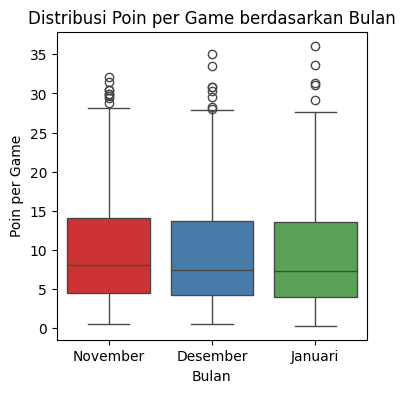

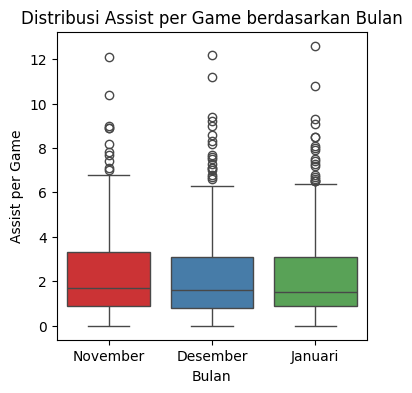

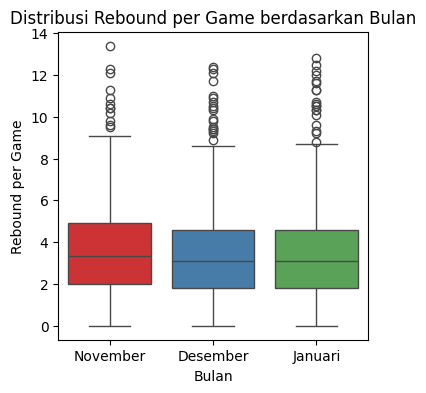

In [30]:
# Mengatur palet warna untuk plot
palette = sns.color_palette("Set1", 3)

# Membuat boxplot untuk distribusi poin per game (PTS) berdasarkan bulan
plt.figure(figsize=(4, 4))  # Mengatur ukuran gambar
sns.boxplot(x='Bulan', y='PTS', hue='Bulan', data=combined_df, palette=palette, dodge=False)  # Membuat boxplot dengan warna yang diatur oleh palette
plt.title('Distribusi Poin per Game berdasarkan Bulan')  # Menambahkan judul pada plot
plt.xlabel('Bulan')  # Menambahkan label sumbu x
plt.ylabel('Poin per Game')  # Menambahkan label sumbu y
plt.legend([],[], frameon=False)  # Menghapus legenda

# Membuat boxplot untuk distribusi assist per game (AST) berdasarkan bulan
plt.figure(figsize=(4, 4))  # Mengatur ukuran gambar
sns.boxplot(x='Bulan', y='AST', hue='Bulan', data=combined_df, palette=palette, dodge=False)  # Membuat boxplot dengan warna yang diatur oleh palette
plt.title('Distribusi Assist per Game berdasarkan Bulan')  # Menambahkan judul pada plot
plt.xlabel('Bulan')  # Menambahkan label sumbu x
plt.ylabel('Assist per Game')  # Menambahkan label sumbu y
plt.legend([],[], frameon=False)  # Menghapus legenda

# Membuat boxplot untuk distribusi rebound per game (TRB) berdasarkan bulan
plt.figure(figsize=(4, 4))  # Mengatur ukuran gambar
sns.boxplot(x='Bulan', y='TRB', hue='Bulan', data=combined_df, palette=palette, dodge=False)  # Membuat boxplot dengan warna yang diatur oleh palette
plt.title('Distribusi Rebound per Game berdasarkan Bulan')  # Menambahkan judul pada plot
plt.xlabel('Bulan')  # Menambahkan label sumbu x
plt.ylabel('Rebound per Game')  # Menambahkan label sumbu y
plt.legend([],[], frameon=False)  # Menghapus legenda

# Menampilkan semua plot
plt.show()

not forgetting I made correlations between player performance metrics.

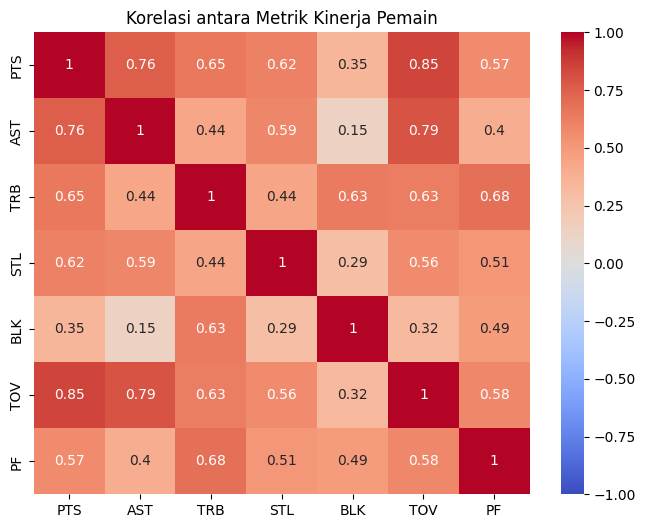

In [31]:
# Membuat figure dengan ukuran 8x6 inch
plt.figure(figsize=(8, 6))

# Menghitung matriks korelasi antara variabel PTS, AST, TRB, STL, BLK, TOV, PF
corr_matrix = combined_df[['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'PF']].corr()

# Membuat heatmap dari matriks korelasi dengan anotasi, menggunakan skala warna 'coolwarm'
# dan membatasi nilai minimum dan maksimum dari skala warna
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Menambahkan judul plot
plt.title('Korelasi antara Metrik Kinerja Pemain')

# Menampilkan plot
plt.show()


I tried to show some top 10 data for various categories in January.

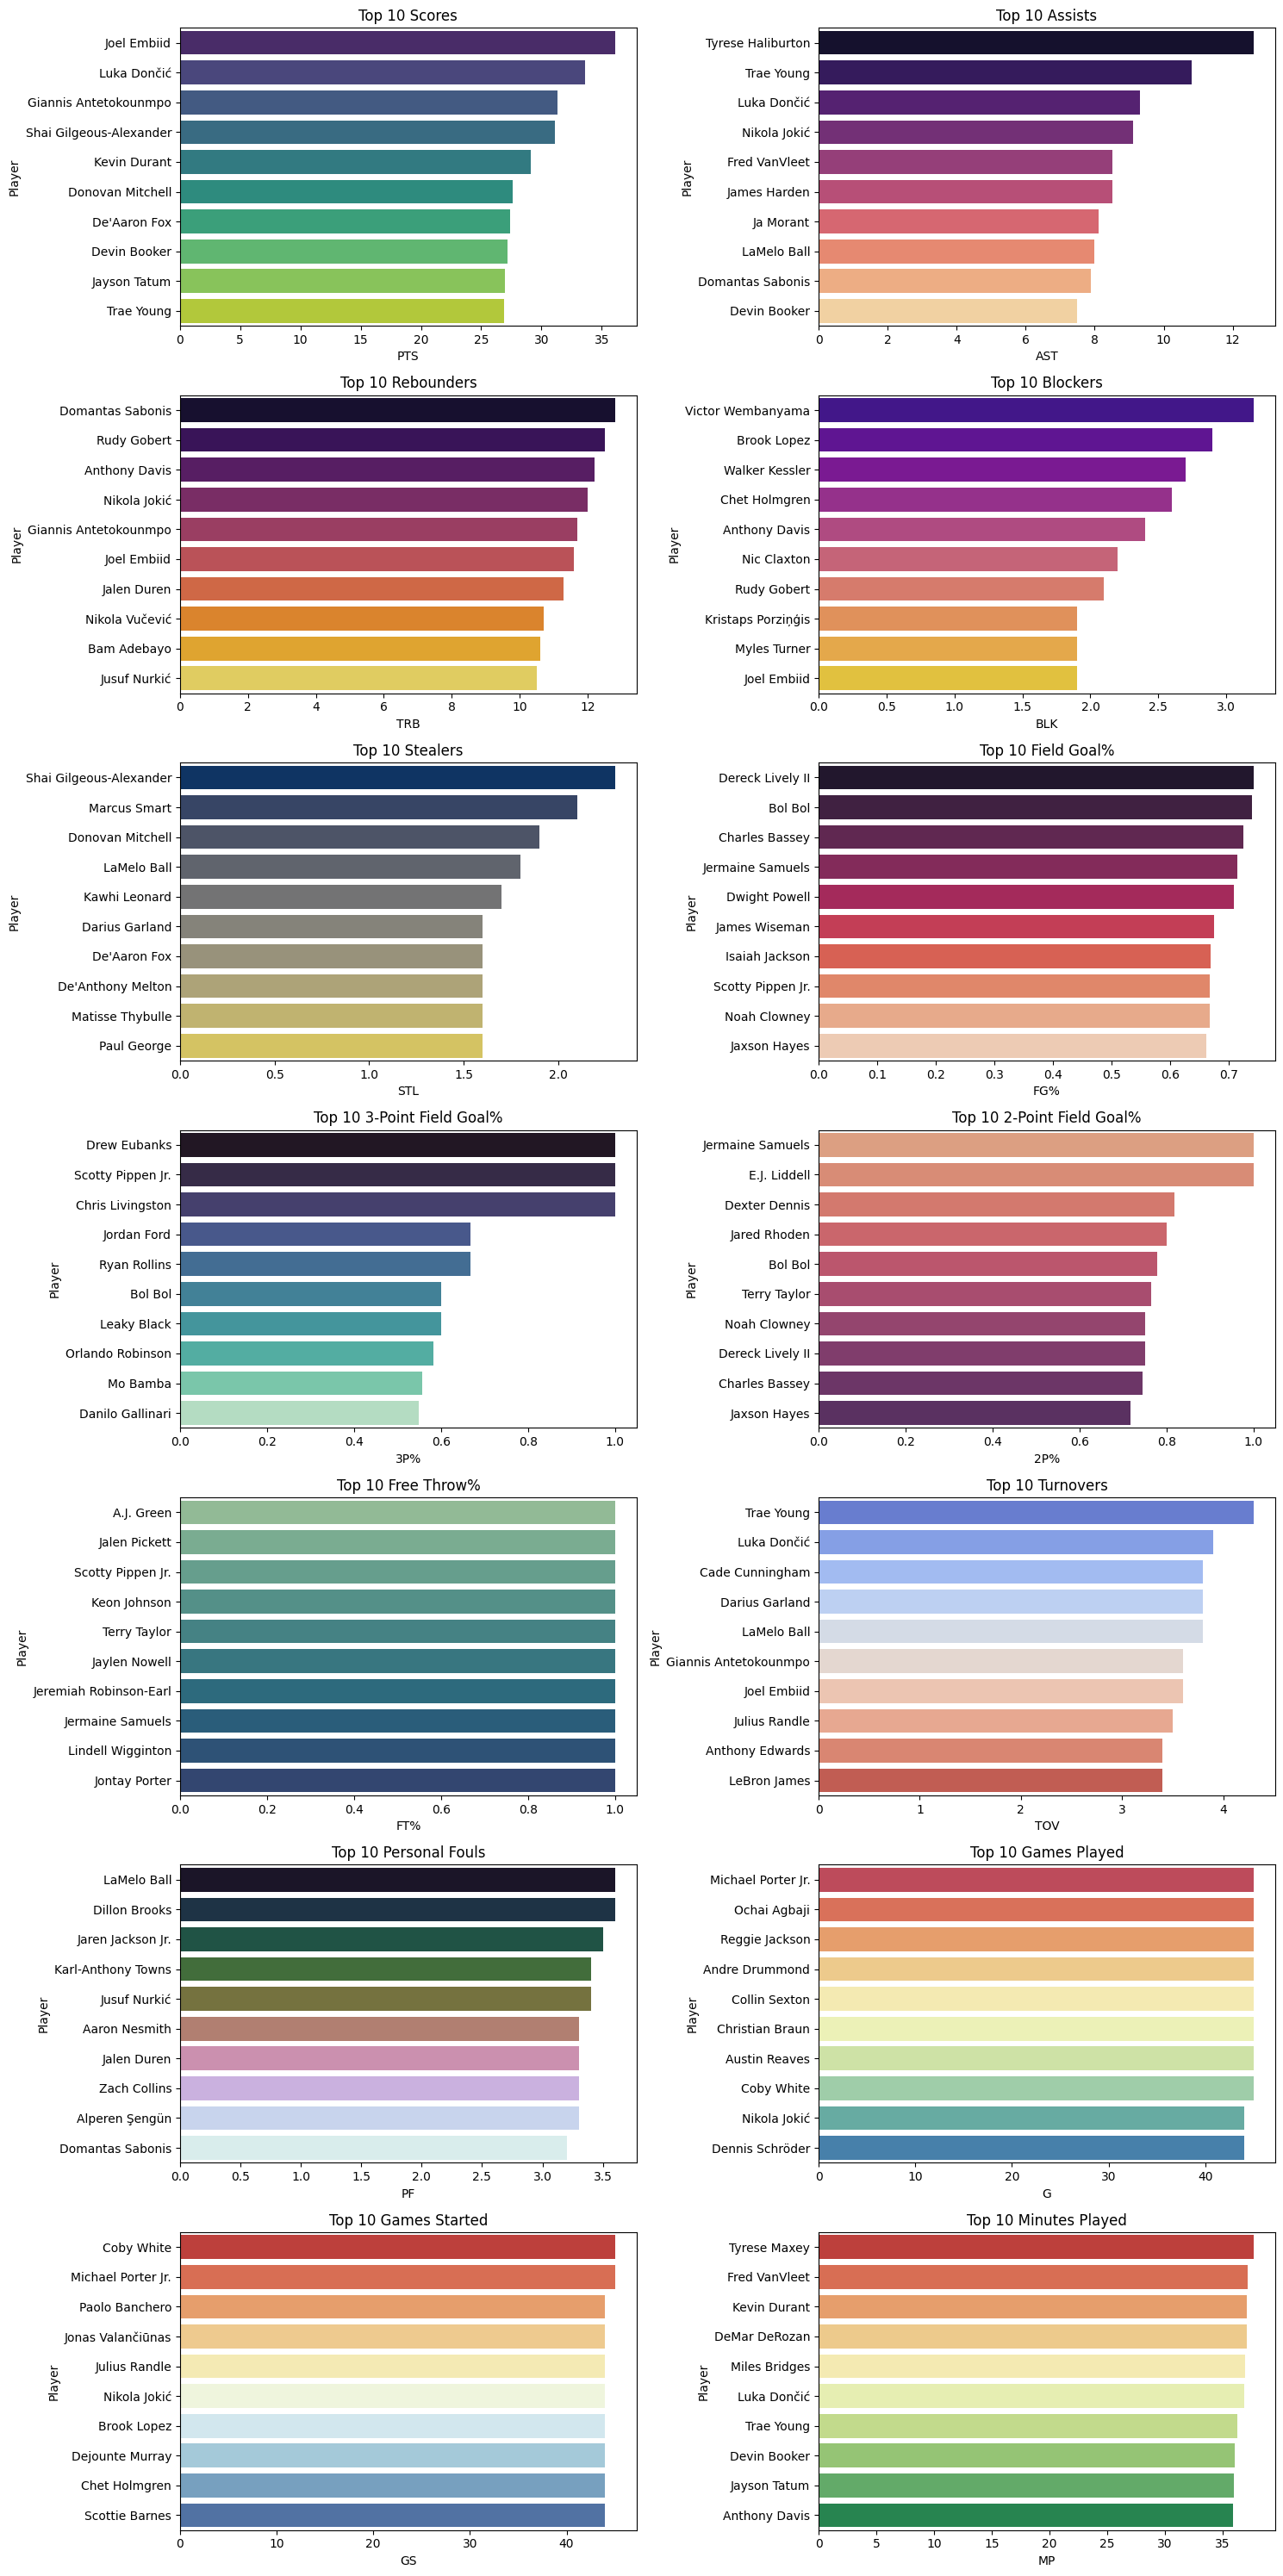

In [32]:
# Menyaring data untuk bulan Januari
january_df = combined_df[combined_df['Bulan'] == 'Januari']

# Mengumpulkan data top 10 untuk berbagai kategori
categories = {
    'PTS': 'Top 10 Scores',
    'AST': 'Top 10 Assists',
    'TRB': 'Top 10 Rebounders',
    'BLK': 'Top 10 Blockers',
    'STL': 'Top 10 Stealers',
    'FG%': 'Top 10 Field Goal%',
    '3P%': 'Top 10 3-Point Field Goal%',
    '2P%': 'Top 10 2-Point Field Goal%',
    'FT%': 'Top 10 Free Throw%',
    'TOV': 'Top 10 Turnovers',
    'PF': 'Top 10 Personal Fouls',
    'G': 'Top 10 Games Played',
    'GS': 'Top 10 Games Started',
    'MP': 'Top 10 Minutes Played'
}

# Menyiapkan figure dan axis untuk subplots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))
axes = axes.flatten()

# Daftar palet warna yang berbeda
palettes = [
    "viridis", "magma", "inferno", "plasma", "cividis", "rocket", "mako", 
    "flare", "crest", "coolwarm", "cubehelix", "Spectral", "RdYlBu", "RdYlGn"
]

for i, (stat, title) in enumerate(categories.items()):
    top_players = january_df.groupby('Player')[stat].mean().sort_values(ascending=False).head(10).reset_index()
    palette = sns.color_palette(palettes[i % len(palettes)], n_colors=10)  # Membuat palet warna sebagai daftar warna
    sns.barplot(x=stat, y='Player', data=top_players, ax=axes[i], hue='Player', palette=palette, dodge=False, legend=False)
    axes[i].set_title(title)
    axes[i].set_xlabel(stat)
    axes[i].set_ylabel('Player')

# Adjust layout
plt.tight_layout()
plt.show()

I also tried to show the top 10 players based on the basic efficiency metric for each month.

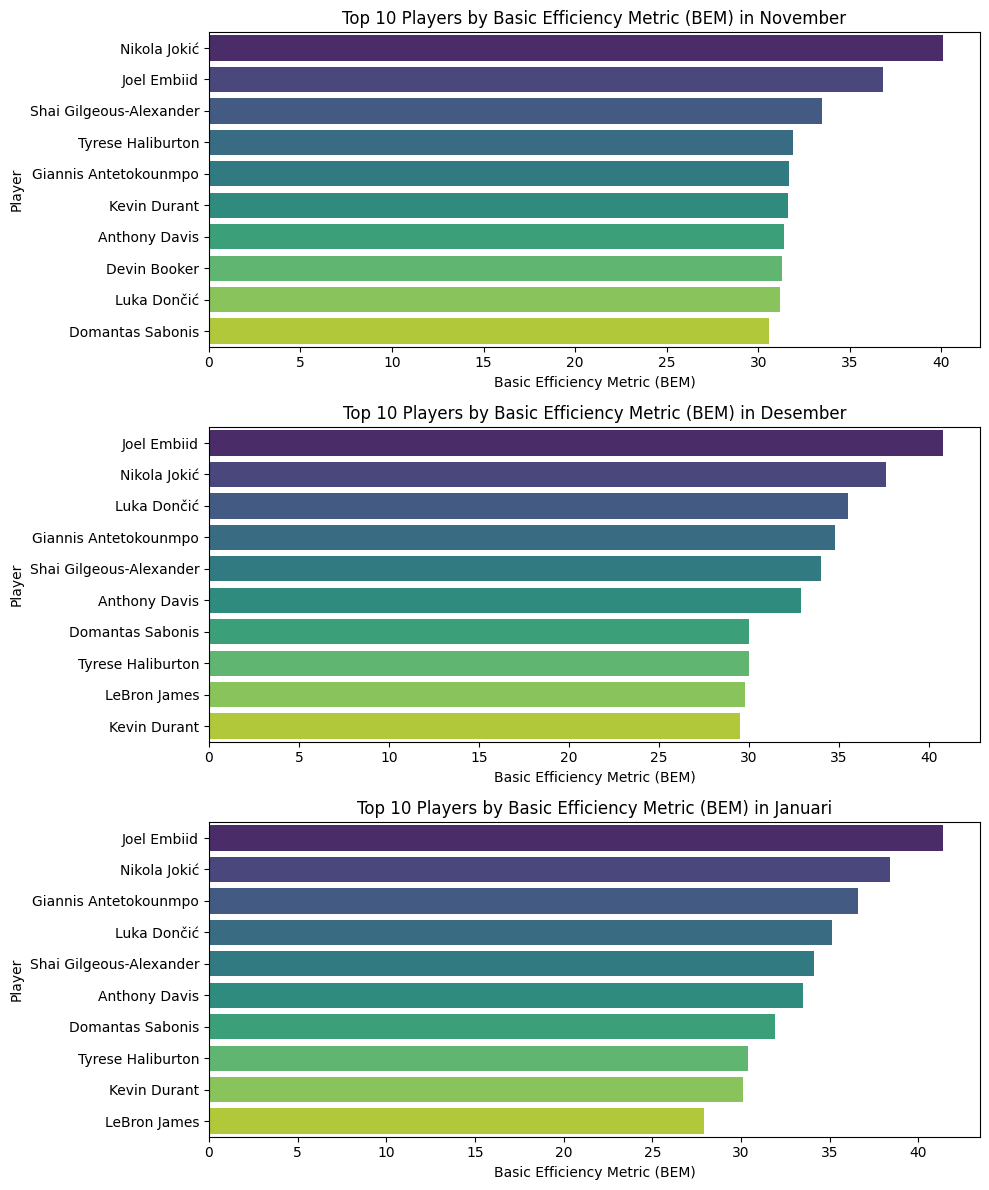

In [33]:
# Menghitung Basic Efficiency Metric (BEM) untuk setiap pemain
combined_df['BEM'] = (
    combined_df['PTS'] +
    combined_df['TRB'] +
    combined_df['AST'] +
    combined_df['STL'] +
    combined_df['BLK'] -
    (combined_df['FGA'] - combined_df['FG']) -
    (combined_df['FTA'] - combined_df['FT']) -
    combined_df['TOV']
)

# Mendapatkan daftar unik bulan dalam data
months = combined_df['Bulan'].unique()

# Menyiapkan figure untuk diagram
fig, axes = plt.subplots(len(months), 1, figsize=(10, len(months) * 4))

# Menggunakan palet warna yang menarik
palette = sns.color_palette("viridis", n_colors=10)

# Membuat diagram batang untuk setiap bulan
for i, month in enumerate(months):
    monthly_df = combined_df[combined_df['Bulan'] == month]
    top_bem_players = monthly_df.groupby('Player')['BEM'].mean().sort_values(ascending=False).head(10).reset_index()
    
    sns.barplot(x='BEM', y='Player', data=top_bem_players, palette=palette, hue='Player', dodge=False, ax=axes[i], legend=False)
    axes[i].set_title(f'Top 10 Players by Basic Efficiency Metric (BEM) in {month}')
    axes[i].set_xlabel('Basic Efficiency Metric (BEM)')
    axes[i].set_ylabel('Player')

# Adjust layout
plt.tight_layout()
plt.show()

## Statistical Analysis
Conduct Statistical Tests to Determine if There are Significant Differences in Player Performance Metrics Across the Months and Use Regression Analysis to Predict Future Performance Trends Based on the Data.

For this task, we need to conduct statistical tests to see if player performance metrics (like PTS, TRB, AST, etc.) vary significantly from month to month. The appropriate test for this kind of analysis is the ANOVA (Analysis of Variance) test, which compares the means of multiple groups to see if at least one is different.

In [34]:
# Metrik kinerja yang akan diuji
metrics = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FGA', 'FG', 'FTA', 'FT', 'TOV']

# Menyiapkan dictionary untuk menyimpan hasil ANOVA
anova_results = {}

for metric in metrics:
    # Pisahkan data berdasarkan bulan
    groups = [group[metric].values for name, group in combined_df.groupby('Bulan')]
    
    # Lakukan uji ANOVA
    f_val, p_val = stats.f_oneway(*groups)
    anova_results[metric] = (f_val, p_val)

# Menampilkan hasil uji ANOVA
for metric, (f_val, p_val) in anova_results.items():
    print(f"{metric}: F-value = {f_val:.2f}, p-value = {p_val:.4f}")

PTS: F-value = 0.74, p-value = 0.4783
TRB: F-value = 0.94, p-value = 0.3893
AST: F-value = 0.36, p-value = 0.7009
STL: F-value = 2.64, p-value = 0.0720
BLK: F-value = 0.24, p-value = 0.7885
FGA: F-value = 1.12, p-value = 0.3251
FG: F-value = 0.71, p-value = 0.4929
FTA: F-value = 0.47, p-value = 0.6272
FT: F-value = 0.42, p-value = 0.6601
TOV: F-value = 2.67, p-value = 0.0699


**Results :**
The p-values for all metrics are greater than 0.05, suggesting that there are no statistically significant differences in these metrics across the months. This means player performance metrics do not significantly vary from month to month based on the given data.

Typically use regression analysis to model the relationship between player performance metrics and time, and then use this model to make future predictions.

The steps conducted were:

- Data Preparation: Combining datasets and computing the Basic Efficiency Metric (BEM).
- Regression Analysis: Using linear regression to predict BEM based on various performance metrics.

Mean Squared Error: 52.23
R-squared: -0.01


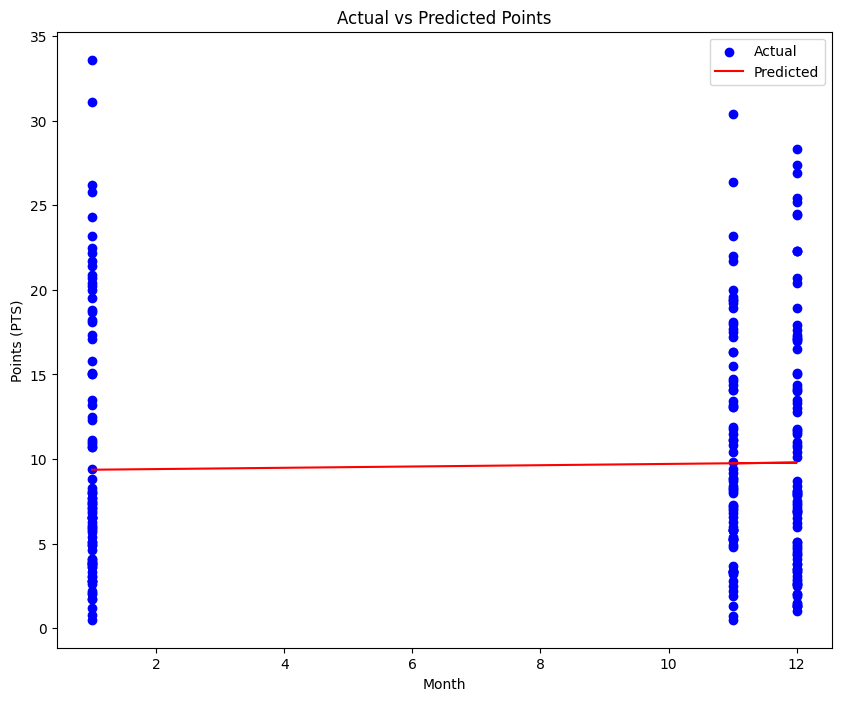

In [35]:
# Mengubah bulan menjadi variabel numerik
combined_df['Month_Num'] = combined_df['Bulan'].map({
    'Januari': 1, 'Februari': 2, 'Maret': 3, 'April': 4,
    'Mei': 5, 'Juni': 6, 'Juli': 7, 'Agustus': 8,
    'September': 9, 'Oktober': 10, 'November': 11, 'Desember': 12
})

# Mempersiapkan data untuk regresi
X = combined_df[['Month_Num']]
y = combined_df['PTS']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Membuat prediksi
predictions = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Plotting tren kinerja
plt.figure(figsize=(10, 8))
plt.scatter(X_test['Month_Num'], y_test, color='blue', label='Actual')
plt.plot(X_test['Month_Num'], predictions, color='red', label='Predicted')
plt.xlabel('Month')
plt.ylabel('Points (PTS)')
plt.title('Actual vs Predicted Points')
plt.legend()
plt.show()

**Results :**
- The negative R² value indicates that the model is not a good fit for the data, and the predictions are worse than simply using the mean of the data.
- This suggests that a simple linear regression model may not be adequate for predicting BEM and that a more complex model or different approach might be necessary.

The following is a heatmap of the correlation between performance measures from the statistical analysis.

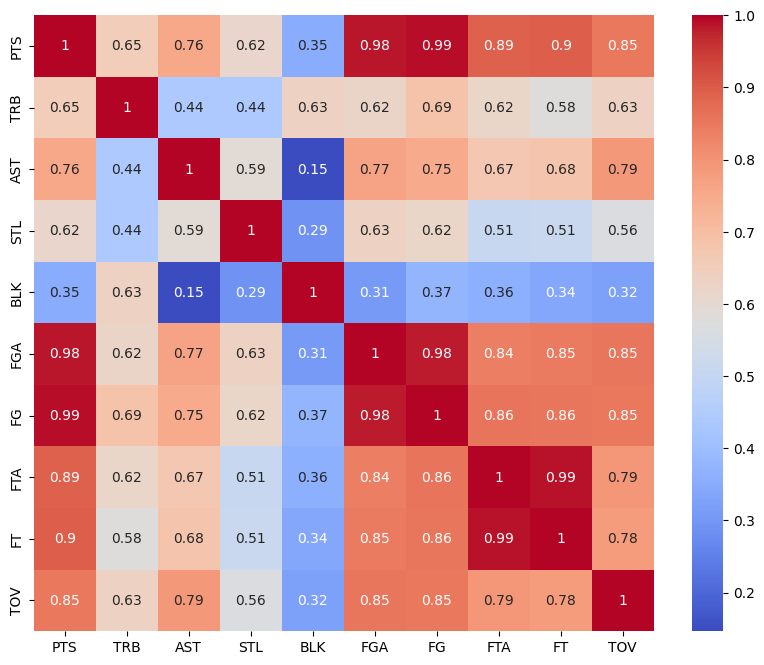

In [37]:
correlation_matrix = combined_df[metrics].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Here is anova for monthly differences.

In [36]:
results = {}
for metric in metrics:
    f_val, p_val = stats.f_oneway(
        combined_df[combined_df['Bulan'] == 'November'][metric],
        combined_df[combined_df['Bulan'] == 'Desember'][metric],
        combined_df[combined_df['Bulan'] == 'Januari'][metric]
    )
    results[metric] = (f_val, p_val)

results_df = pd.DataFrame(results, index=['F-value', 'p-value']).T

And below is the distribution of performance metrics.

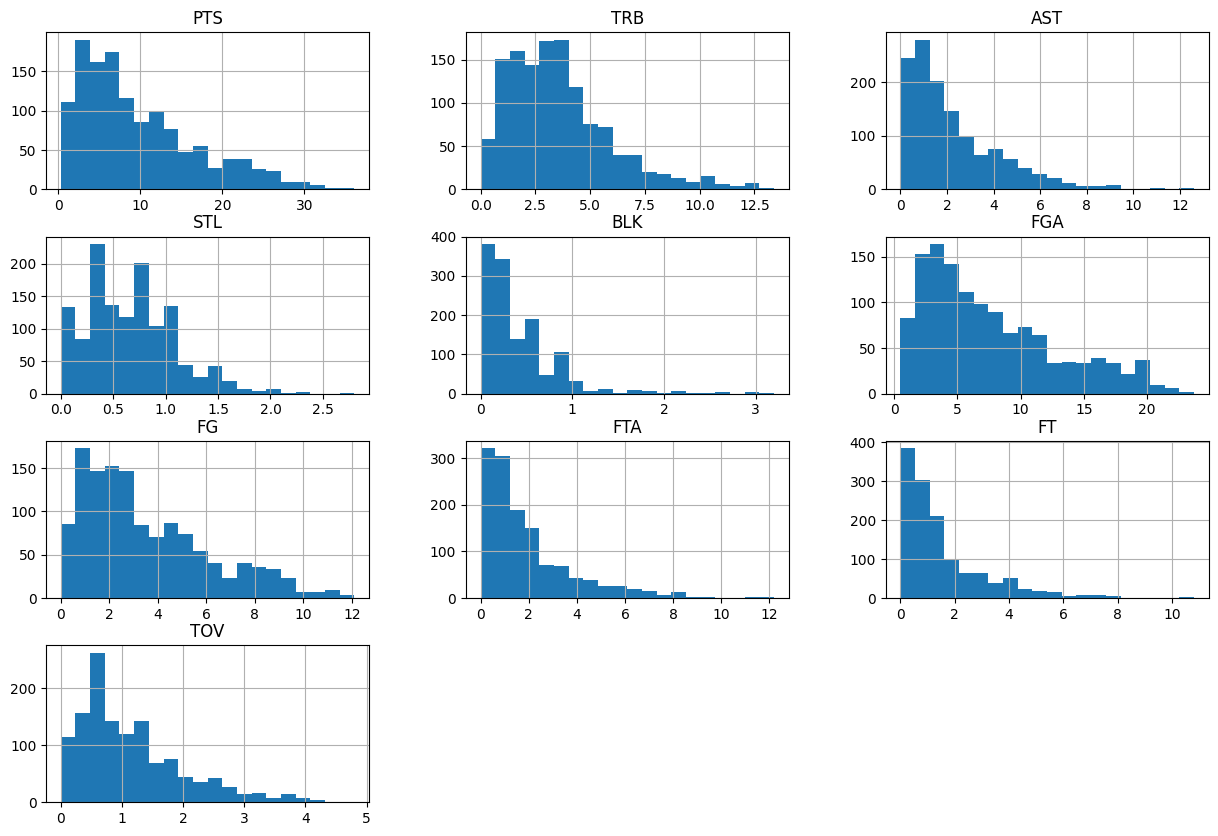

In [40]:
metrics = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FGA', 'FG', 'FTA', 'FT', 'TOV']
combined_df[metrics].hist(bins=20, figsize=(15, 10))
plt.show()

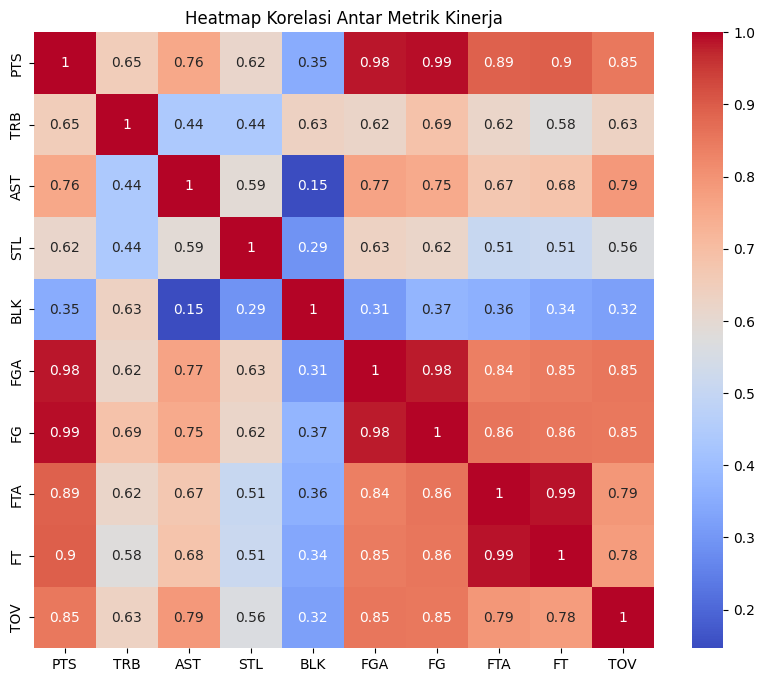

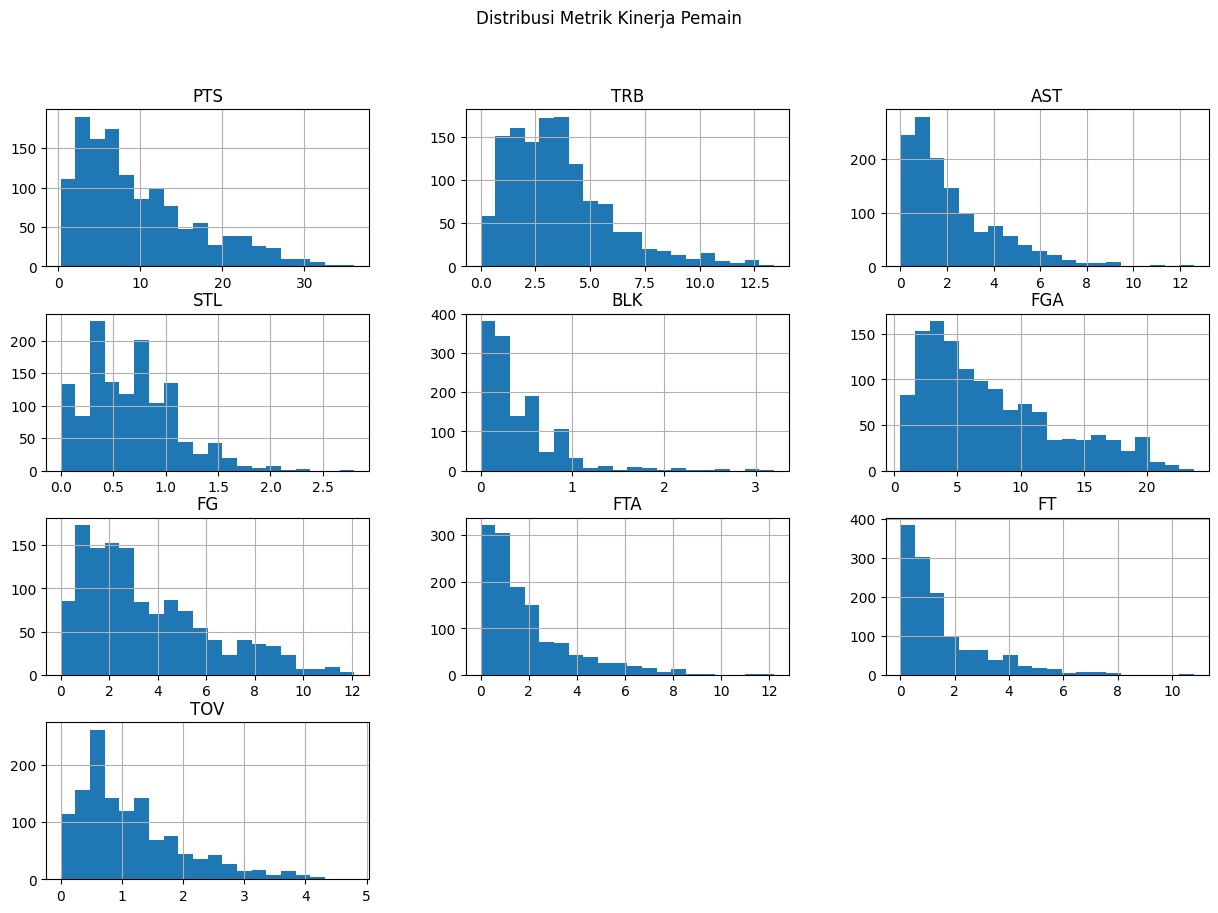

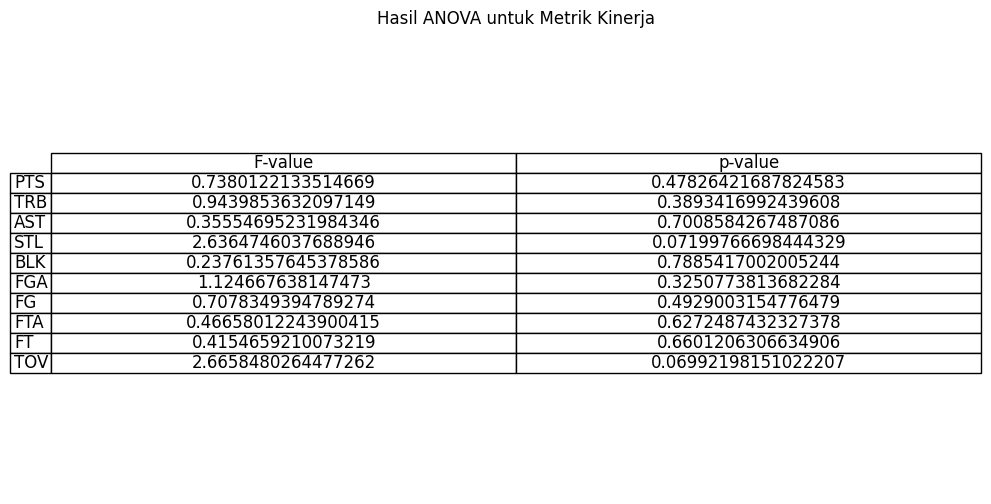

In [41]:
# Heatmap Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Metrik Kinerja')
plt.show()

# Histogram Distribusi Metrik
combined_df[metrics].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribusi Metrik Kinerja Pemain')
plt.show()

# Tabel Hasil ANOVA
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, rowLabels=results_df.index, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title('Hasil ANOVA untuk Metrik Kinerja')
plt.show()

## Conclusion
From the analysis I have done above, I can conclude the following:
- There is no significant difference in the performance of players in various months
- The model cannot predict future performance well.
- Simple regression models are not suitable for predicting future performance.
- Comparisons within the same season illustrate the diversity of skills and roles among players.
- Players who excel in scoring are not necessarily the best players in rebounding or assists, indicating specialization in different aspects of the game.
- Such analysis helps in understanding player roles, team dynamics, and can be useful for coaches, analysts, and fans to evaluate player contributions beyond just scoring.